In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# Get data
precipitation = pd.read_csv('monthwise_datasets/Monthwise_Precipitation.csv')
sunspot = pd.read_csv('monthwise_datasets/Monthwise_Sunspot.csv')

sunspot['Date']= pd.to_datetime(sunspot['Date'])
precipitation['Date']= pd.to_datetime(precipitation['Date'])

In [3]:
# Clipping data to our needs
sunspot.set_index('Date', inplace=True)
precipitation.set_index('Date', inplace=True)

In [4]:
# Precipitation is from Jan, 1951 till Dec, 2016
# Hence, we clip the sunspot data for that range
sunspot = sunspot['1951-01-01': '2016-12-31']

In [9]:
sunspot['year'] = pd.DatetimeIndex(sunspot.index).year
precipitation['year'] = pd.DatetimeIndex(precipitation.index).year

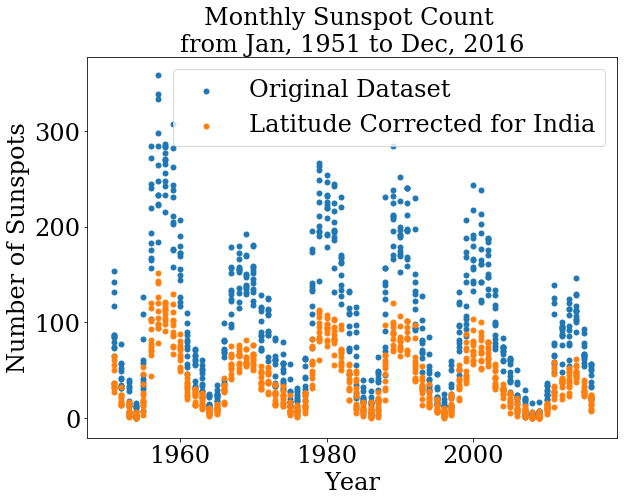

In [102]:
plt.figure(figsize=(10,7))
plt.scatter(sunspot['year'],sunspot['Sunspot'], s=25, label='Original Dataset')
plt.scatter(sunspot['year'],sunspot['Sunspot']*np.cos(20)/np.cos(50), s=25, label='Latitude Corrected for India')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.title('Monthly Sunspot Count \nfrom Jan, 1951 to Dec, 2016')
plt.legend()
plt.savefig('sunspot_count.png')
plt.show()

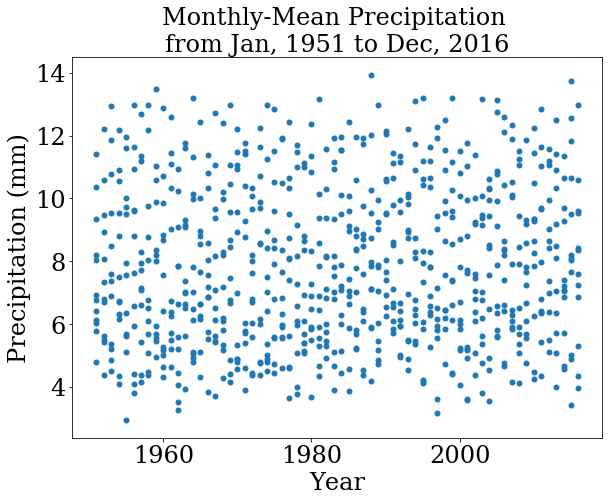

In [108]:
plt.figure(figsize=(10,7))
plt.scatter(precipitation['year'],precipitation['Precipitation'], s=25)
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.title('Monthly-Mean Precipitation \nfrom Jan, 1951 to Dec, 2016')
plt.savefig('precipitation_count.png')
plt.show()

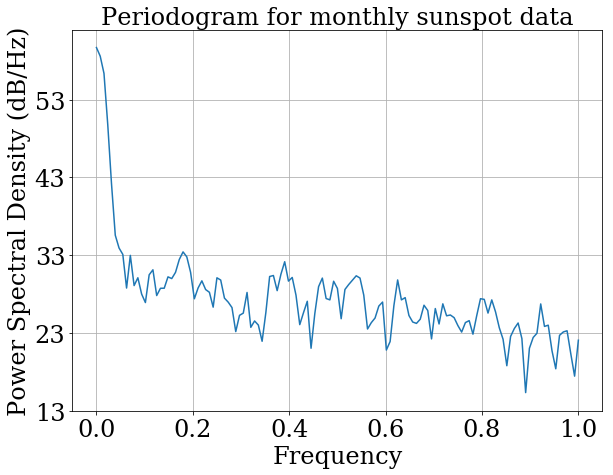

In [110]:
plt.figure(figsize=(9,6))
plt.psd(sunspot['Sunspot'])
plt.title('Periodogram for monthly sunspot data')
plt.savefig('periodogram_sunspot.png')
plt.show()

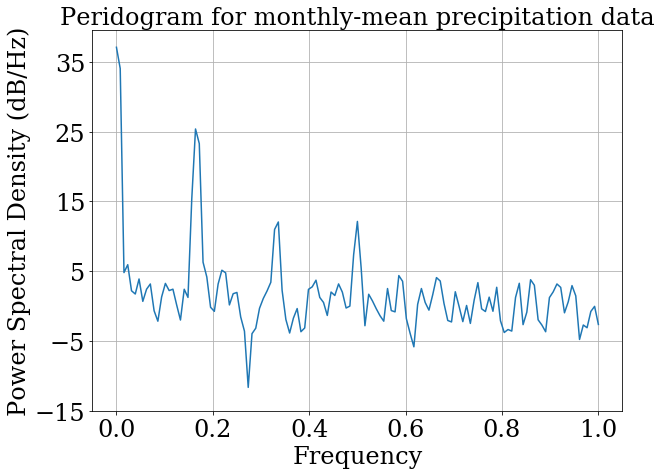

In [111]:
plt.figure(figsize=(9,6))
plt.psd(precipitation['Precipitation'])
plt.title('Peridogram for monthly-mean precipitation data')
plt.savefig('peridogram_precipitation.png')
plt.show()

# Correlation

In [112]:
sunspot['month'] = pd.DatetimeIndex(sunspot.index).month

sunspot_new = pd.DataFrame()
for i in sunspot.groupby('month'):
    sunspot_new[i[0]] = pd.Series(list(i[1]['Sunspot']))
    
sunspot_new.columns = ['Jan_S', 'Feb_S', 'Mar_S', 'Apr_S', 'May_S', 'Jun_S', 'Jul_S','Aug_S', 'Sep_S', 'Oct_S', 'Nov_S', 'Dec_S']

In [113]:
precipitation['month'] = pd.DatetimeIndex(precipitation.index).month

precipitation_new = pd.DataFrame()
for i in precipitation.groupby('month'):
    precipitation_new[i[0]] = pd.Series(list(i[1]['Precipitation']))
    
precipitation_new.columns = ['Jan_P', 'Feb_P', 'Mar_P', 'Apr_P', 'May_P', 'Jun_P', 'Jul_P','Aug_P', 'Sep_P', 'Oct_P', 'Nov_P', 'Dec_P']

In [114]:
result = pd.concat([sunspot_new, precipitation_new], axis=1).corr()
corr_mat = result[sunspot_new.columns].ix[precipitation_new.columns]

/home/naman_j/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[Text(0,0.5,'Jan'),
 Text(0,1.5,'Feb'),
 Text(0,2.5,'Mar'),
 Text(0,3.5,'Apr'),
 Text(0,4.5,'May'),
 Text(0,5.5,'Jun'),
 Text(0,6.5,'Jul'),
 Text(0,7.5,'Aug'),
 Text(0,8.5,'Sep'),
 Text(0,9.5,'Oct'),
 Text(0,10.5,'Nov'),
 Text(0,11.5,'Dec')]

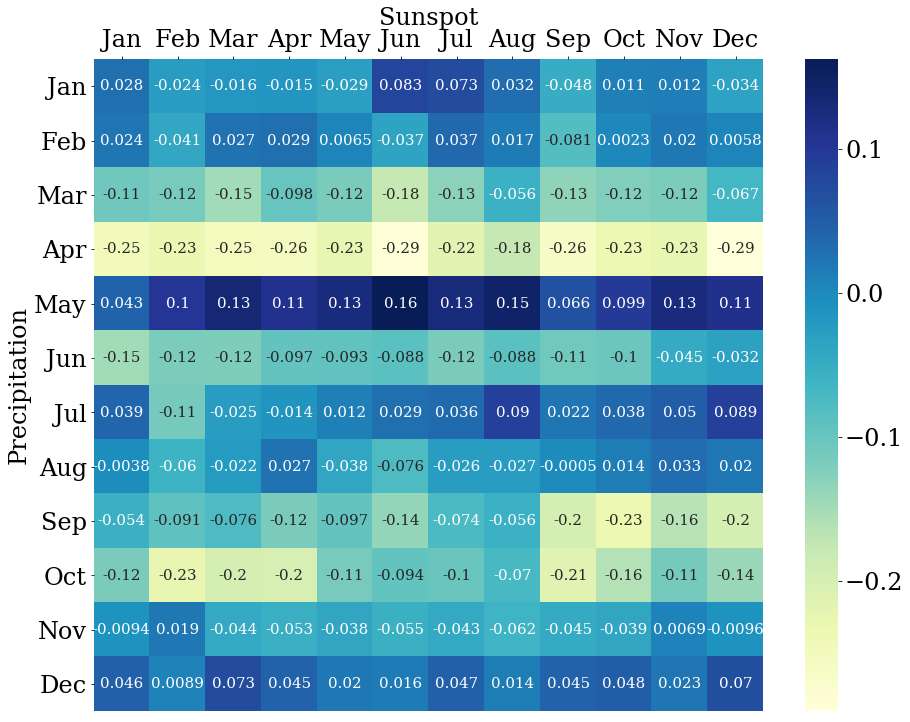

In [117]:
matplotlib.rcParams.update({'font.size': 15})

f, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set_xlabel('Sunspot')
ax.set_ylabel('Precipitation')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.savefig('corr_mat.png')

# P-Values

In [118]:
inter_result = result.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(result.columns)) 
p_mat = inter_result[sunspot_new.columns].ix[precipitation_new.columns]

/home/naman_j/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[Text(0,0.5,'Jan'),
 Text(0,1.5,'Feb'),
 Text(0,2.5,'Mar'),
 Text(0,3.5,'Apr'),
 Text(0,4.5,'May'),
 Text(0,5.5,'Jun'),
 Text(0,6.5,'Jul'),
 Text(0,7.5,'Aug'),
 Text(0,8.5,'Sep'),
 Text(0,9.5,'Oct'),
 Text(0,10.5,'Nov'),
 Text(0,11.5,'Dec')]

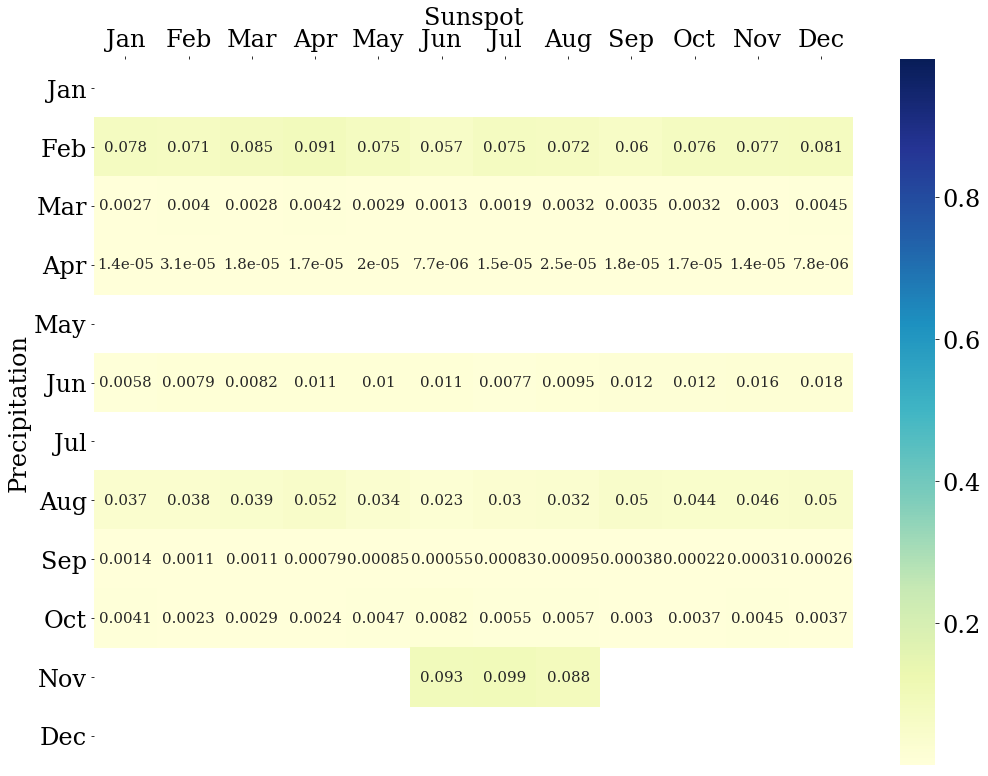

In [121]:
matplotlib.rcParams.update({'font.size': 12})

f, ax = plt.subplots(figsize=(17, 13))
ax = sns.heatmap(p_mat, mask=p_mat > 0.1 ,annot=True, cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

ax.set_xlabel('Sunspot')
ax.set_ylabel('Precipitation')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_title('P-Values of Monthly correlation between Sunspot and Precipitation')
plt.savefig('p_values.png')

In [122]:
def data(range_):
    precipitation = pd.read_csv('monthwise_datasets/Monthwise_Precipitation.csv')
    sunspot = pd.read_csv('monthwise_datasets/Monthwise_Sunspot.csv')

    sunspot['Date']= pd.to_datetime(sunspot['Date'])
    precipitation['Date']= pd.to_datetime(precipitation['Date'])

    sunspot.set_index('Date', inplace=True)
    precipitation.set_index('Date', inplace=True)

    sunspot = sunspot[range_[0]:range_[1]] #['1951-01-01': '2017-01-01']

    sunspot['year'] = pd.DatetimeIndex(sunspot.index).year
    precipitation['year'] = pd.DatetimeIndex(precipitation.index).year

    sunspot['month'] = pd.DatetimeIndex(sunspot.index).month
    precipitation['month'] = pd.DatetimeIndex(precipitation.index).month

    precipitation = precipitation.asfreq('M', method='bfill')
    sunspot = sunspot.asfreq('M', method='bfill')
    
    return precipitation, sunspot

In [123]:
from scipy.stats import pearsonr
list_ = []
for i in range(1,12):
    year_start = 1951 - i
    year_end = 2017 - i
    
    precipitation, sunspot = data(['%s-01-01'%(year_start), '%s-01-01'%(year_end)])
    list_.append(pearsonr(precipitation['Precipitation'].diff(12).dropna(), sunspot['Sunspot'][12:])[0])

Text(0.5,1,'Correlation between Precipitaion and Sunspot \n(X-axis has the year delays in Sunspot data)')

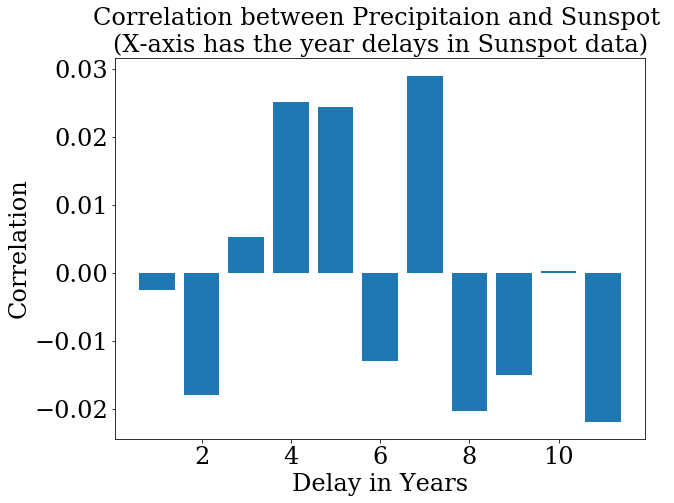

In [125]:
plt.figure(figsize=(8,6))
plt.bar(range(1,12), list_)
plt.xlabel('Delay in Years')
plt.ylabel('Correlation')
plt.title('Correlation between Precipitaion and Sunspot \n(X-axis has the year delays in Sunspot data)')
plt.savefig('corr.png')